In [2]:
# Importa librerias
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos y mostrarlos
ruta = "..//../results/WHCd_Juarez_clean_v1.csv"
datos = pd.read_csv(ruta)
datos.head()

,tiempo_americano,time_num_usa,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,...,pm_nivel_del_mar,evap_potencial,tip_precipitacion,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,dir_viento,vel_viento
0,1/1/2000,36526,-1.669281,-0.020920,7.480493,17.317834,1907.450439,-7.220000e-06,2.148321,-2.000000e-06,...,1012.635625,-1.250000e-05,0,13.064264,0.137127,0.152496,0.0,89,este,1.669412
1,1/1/2000,36526,-1.951294,-0.468689,8.055566,16.767297,2135.849121,-1.550000e-06,2.747254,-4.300000e-07,...,1012.456250,-6.860000e-07,0,12.453210,0.137084,0.236725,0.0,76,este,2.006793
2,1/1/2000,36526,-1.763443,-0.294388,5.953119,14.243799,2208.853027,-4.540000e-07,2.561296,-1.230000e-07,...,1012.368125,6.660000e-07,0,10.392664,0.137066,0.579987,0.0,81,este,1.787847
3,1/1/2000,36526,-1.436081,0.382751,5.892938,11.471796,7484.599609,3.110000e-07,2.200583,8.660000e-08,...,1012.543125,1.220000e-06,0,8.273584,0.137028,0.482239,0.0,105,este,1.486212
4,1/1/2000,36526,-0.908798,1.725983,5.761438,11.316980,4100.225235,6.010000e-07,2.526732,1.660000e-07,...,1012.673750,1.130000e-06,0,7.544336,0.137005,0.411499,0.0,152,sureste,1.950623


In [3]:
# Ver los tipos de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209424 entries, 0 to 209423
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tiempo_americano      209424 non-null  object 
 1   time_num_usa          209424 non-null  int64  
 2   viento_U              209424 non-null  float64
 3   viento_V              209424 non-null  float64
 4   pto_rocio             209424 non-null  float64
 5   tem_viento            209424 non-null  float64
 6   alt_nube              209424 non-null  float64
 7   evaporacion           209424 non-null  float64
 8   rafaga_viento         209424 non-null  float64
 9   evap_media            209424 non-null  float64
 10  evap_media_potencial  209424 non-null  float64
 11  pm_nivel_del_mar      209424 non-null  float64
 12  evap_potencial        209424 non-null  float64
 13  tip_precipitacion     209424 non-null  int64  
 14  temp_del_suelo        209424 non-null  float64
 15  

In [4]:
# Ver los valores uniqcos de la serie
datos['tiempo_americano'].unique()

array(['1/1/2000', '1/2/2000', '1/3/2000', ..., '11/19/2023',
       '11/20/2023', '11/21/2023'], dtype=object)

In [5]:
#daots=datos.drop(columns=['tiempo_americano'])

In [6]:
# Ver los valores uniqcos de la serie, luego seran tranformadas en un numero
datos['dir_viento'].unique()

array(['este', 'sureste', 'sur', 'sudoeste', 'oeste', 'noreste', 'norte'],
      dtype=object)

In [7]:
datos['dir_viento']

0            este
1            este
2            este
3            este
4         sureste
           ...   
209419       este
209420       este
209421       este
209422       este
209423       este
Name: dir_viento, Length: 209424, dtype: object

In [8]:
# Reemplazar los dtype=object a float64 o int64
# para un mejor entendimiento de nuestro modelo
datos_dir_viento = {"dir_viento": {'este': 1, 'sureste': 2,
                                 'sur': 3, 'sudoeste': 4, 'oeste': 5, 'noreste': 6, 'norte': 7}}
datos.replace(datos_dir_viento, inplace=True)
datos.head()

,tiempo_americano,time_num_usa,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,...,pm_nivel_del_mar,evap_potencial,tip_precipitacion,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,dir_viento,vel_viento
0,1/1/2000,36526,-1.669281,-0.020920,7.480493,17.317834,1907.450439,-7.220000e-06,2.148321,-2.000000e-06,...,1012.635625,-1.250000e-05,0,13.064264,0.137127,0.152496,0.0,89,1,1.669412
1,1/1/2000,36526,-1.951294,-0.468689,8.055566,16.767297,2135.849121,-1.550000e-06,2.747254,-4.300000e-07,...,1012.456250,-6.860000e-07,0,12.453210,0.137084,0.236725,0.0,76,1,2.006793
2,1/1/2000,36526,-1.763443,-0.294388,5.953119,14.243799,2208.853027,-4.540000e-07,2.561296,-1.230000e-07,...,1012.368125,6.660000e-07,0,10.392664,0.137066,0.579987,0.0,81,1,1.787847
3,1/1/2000,36526,-1.436081,0.382751,5.892938,11.471796,7484.599609,3.110000e-07,2.200583,8.660000e-08,...,1012.543125,1.220000e-06,0,8.273584,0.137028,0.482239,0.0,105,1,1.486212
4,1/1/2000,36526,-0.908798,1.725983,5.761438,11.316980,4100.225235,6.010000e-07,2.526732,1.660000e-07,...,1012.673750,1.130000e-06,0,7.544336,0.137005,0.411499,0.0,152,2,1.950623


In [9]:
datos['dir_viento']

0         1
1         1
2         1
3         1
4         2
         ..
209419    1
209420    1
209421    1
209422    1
209423    1
Name: dir_viento, Length: 209424, dtype: int64

In [10]:
datos = datos.drop(columns='tiempo_americano')

In [11]:
# Nuevo dataset
ruta="../../results/WHCd_Juarez_clean_v3.csv"
datos.to_csv(ruta,index=False)

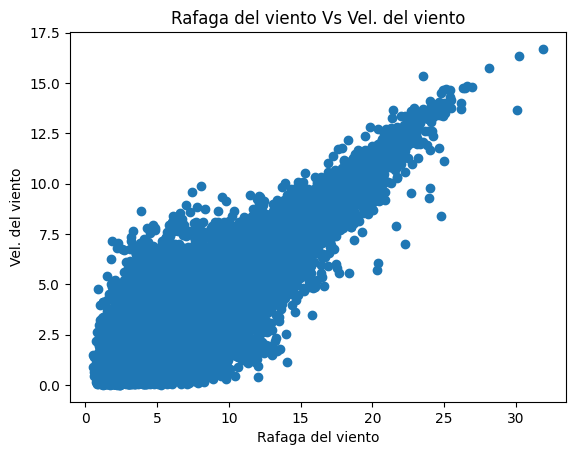

In [12]:
plt.scatter(x=datos['rafaga_viento'], y=datos['vel_viento'])
plt.title('Rafaga del viento Vs Vel. del viento')
plt.xlabel('Rafaga del viento')
plt.ylabel('Vel. del viento')
plt.show()

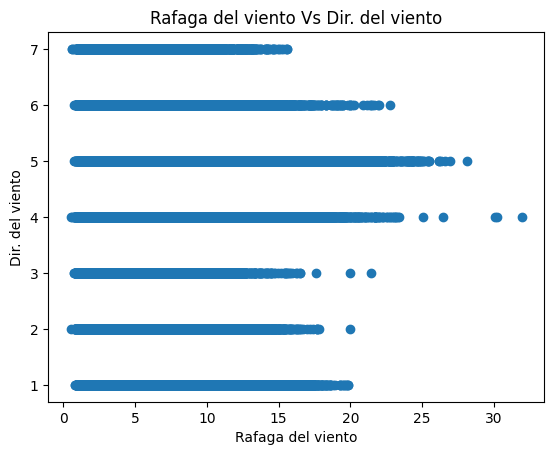

In [13]:
plt.scatter(x=datos['rafaga_viento'], y=datos['dir_viento'])
plt.title('Rafaga del viento Vs Dir. del viento')
plt.xlabel('Rafaga del viento')
plt.ylabel('Dir. del viento')
plt.show()